In [5]:
ClearAll["Global`*"]
VarName[var_, index_]:=ToExpression[StringJoin[ToString[var], ToString[index]]]
Par[index_]:=VarName[\[Theta], index] (*parameters, parametric space*)
Sup[index_]:=VarName[X, index] (*support*)
PP[index_]:=VarName[pp, index] (*just an utility variable*)
(*L[index_]:=VarName[L, index]*)
(*RemoveAbs[f_]:=ComplexExpand[Abs[f]]*)
DefaultSimplify[f_]:=FullSimplify[f, Assumptions->_\[Element]PositiveReals]
Unprotect[Abs, Arg];
Abs[x_]:=x
Arg[x_]:=0
Protected[Abs, Arg];

(*Gives the number of parameters, supports and levels*)
Universe[f_]:=With[{parameters=Flatten[StringCases[ToString[#]&/@DeleteDuplicates[Cases[f, _Symbol, \[Infinity]]], RegularExpression["\[Theta][0-9]+"]]], supports=Flatten[StringCases[ToString[#]&/@DeleteDuplicates[Cases[f, _Symbol, \[Infinity]]], RegularExpression["X[0-9]+"]]], levels=Flatten[StringCases[ToString[#]&/@DeleteDuplicates[Cases[f, _Symbol, \[Infinity]]], RegularExpression["L[0-9]+"]]]},
{Length[parameters], Length[supports], Length[levels]}]

derivativeProduct[f_, coordinates_]:=Table[D[f, Par[i]] D[f, Par[j]], {i, 1, coordinates}, {j, 1, coordinates}]
gMetric[p_]:=With[{spacesize=Length[p], coordinates=Universe[p][[1]]}, Sum[derivativeProduct[p[[k]], coordinates], {k, 1, spacesize}]]
FIT[p_]:=With[{spacesize=Length[p], coordinates=Universe[p][[1]]}, Sum[derivativeProduct[p[[k]], coordinates]/p[[k]], {k, 1, spacesize}]]
\[Mu][p_]:=1/Total[1/4 p^2]
FITgMetric[p_]:=-derivativeProduct[\[Mu][p], Universe[p][[1]]]/\[Mu][p]^2+\[Mu][p]gMetric[p]
LargestNonSingular[m_]:=DeleteCases[m//Eigenvalues//DefaultSimplify, 0]//DiagonalMatrix
JacobianMatrix[p_]:=With[{spacesize=Length[p],coordinates=Universe[p][[1]]}, Table[D[p[[i]], Par[j]], {i, 1, spacesize}, {j, 1, coordinates}]]

{θ1 Cos[θ3] Sin[θ2], θ1 Sin[θ2] Sin[θ3], θ1 Cos[θ2]}
Cos[θ3] Sin[θ2]         θ1 Cos[θ2] Cos[θ3]      -(θ1 Sin[θ2] Sin[θ3])

Sin[θ2] Sin[θ3]         θ1 Cos[θ2] Sin[θ3]      θ1 Cos[θ3] Sin[θ2]

Cos[θ2]                 -(θ1 Sin[θ2])           0

1              0              0

                 2
0              θ1             0

                                2        2
0              0              θ1  Sin[θ2]

0            0            0


0            4            0

                                   2
0            0            4 Sin[θ2]
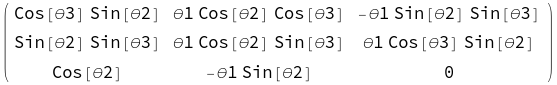
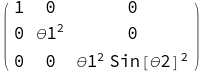
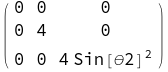

In [22]:
p=CoordinateTransform["Spherical"->"Cartesian",{Par[1], Par[2], Par[3]}]
JacobianMatrix[p]//DefaultSimplify//MatrixForm
gMetric[p]//DefaultSimplify//Eigenvalues//DiagonalMatrix//MatrixForm
FITgMetric[p]//DefaultSimplify//MatrixForm

1   0   0

0   1   0

0   0   1
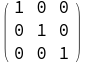

In [26]:
p=CoordinateTransform["Spherical"->"Cartesian",{Par[1], Par[2], Par[3]}];
jc=JacobianMatrix[p]//Inverse//DefaultSimplify;
Transpose[jc].{{1, 0, 0}, {0, Par[1]^2, 0}, {0, 0, Par[1]^2 Sin[Par[2]]^2}}.jc//DefaultSimplify//MatrixForm

In [ ]:
p=CoordinateTransform["Cartesian"->"Spherical",{Par[1], Par[2], Par[3]}];
jc=JacobianMatrix[2 p/Sqrt[Total[p^2]]]//DefaultSimplify;
Transpose[jc].{{0, 0, 0}, {0, 4/(Par[1]^2+Par[2]^2+Par[3]^2), 0}, {0, 0, 4/(Par[1]^2+Par[2]^2+Par[3]^2)}}.jc//DefaultSimplify//MatrixForm
Transpose[jc].{{0, 0, 0}, {0, 4, 0}, {0, 0, 4 Sin[Par[2]]^2}}.jc//DefaultSimplify//MatrixForm
Transpose[jc].IdentityMatrix[3].jc//DefaultSimplify//MatrixForm
Transpose[jc].{{1, 0, 0}, {0, Par[1]^2, 0}, {0, 0, Par[1]^2 Sin[Par[2]]^2}}.jc//DefaultSimplify//MatrixForm

In [ ]:
p=CoordinateTransform["Spherical"->"Cartesian",{Par[1], Par[2], Par[3]}];
jc=JacobianMatrix[2 p/Sqrt[Total[p^2]]]//PseudoInverse
(*Transpose[jc].{{4/(Par[1]^2+Par[2]^2+Par[3]^2), 0}, {0, 4/(Par[1]^2+Par[2]^2+Par[3]^2)}}.jc//DefaultSimplify//Det//DefaultSimplify
Transpose[jc].{{4, 0}, {0, 4 Sin[Par[2]]^2}}.jc//DefaultSimplify//Det//DefaultSimplify
Transpose[jc].IdentityMatrix[2].jc//DefaultSimplify//Det//DefaultSimplify*)
(*Transpose[jc].{{1, 0, 0}, {0, Par[1]^2, 0}, {0, 0, Par[1]^2 Sin[Par[2]]^2}}.jc//DefaultSimplify//MatrixForm*)